# Validation
## polimonial (more detail check 366 pythondatasciencehandbook)


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [2]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

ham x=random, y=10-1/(x^2+0.1) neu err>0: y=y+err*rand

In [6]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [15]:
X,y=make_data(40)


Vẽ đồ thị với 1 vài degree của polynomial

(500, 1)


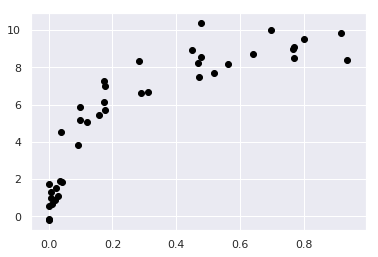

In [14]:
import matplotlib.pyplot as plt
import seaborn;
seaborn.set() 

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
print(X_test.shape)
plt.scatter(X.ravel(), y, color='black')


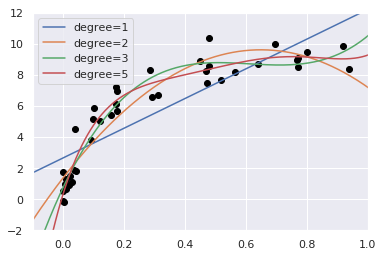

In [21]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,2, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best');

Từ hình ta thấy là không thể bt được tham số degree nào là phù hợp, chả nhẽ cứ đi thử hết
May sao sklearn cung câsp hàm validation_curve, hàm này giúp vẽ nên đường cong validation của các degree từ đó có thể xác định đựowc các góc 

In [24]:
from sklearn.model_selection import validation_curve

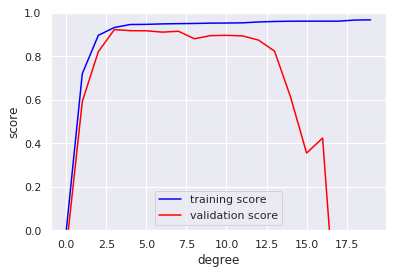

In [29]:
degree=np.arange(20)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');